In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('./PS-2025.1/Data/campeonatos_futebol_atualizacao.csv')

In [5]:
df.head()

,Chutes a gol 1,Chutes a gol 2,Impedimentos 1,Impedimentos 2,Escanteios 1,Escanteios 2,Chutes fora 1,Chutes fora 2,Faltas 1,Faltas 2,...,Tiros-livres 1,Tiros-livres 2,Defesas difíceis 1,Defesas difíceis 2,Posse 1(%),Posse 2(%),Time 1,Time 2,Position 1,Position 2
0,8.0,0.0,6.0,3.0,7.0,1.0,6.0,1.0,8.0,14.0,...,NaN,NaN,NaN,NaN,77.0,23.0,Glasgow Rangers,Livingston,4-3-3,4-3-3
1,0.0,2.0,0.0,2.0,0.0,4.0,3.0,4.0,19.0,14.0,...,NaN,NaN,NaN,NaN,44.0,56.0,Ross County,St.Johnstone,3-5-2,3-5-2
2,4.0,5.0,1.0,5.0,8.0,11.0,2.0,5.0,13.0,14.0,...,NaN,NaN,NaN,NaN,47.0,53.0,Dundee FC,St. Mirren,4-3-3,3-4-1-2
3,4.0,7.0,8.0,1.0,6.0,5.0,4.0,7.0,4.0,11.0,...,NaN,NaN,NaN,NaN,27.0,73.0,Hearts,Celtic,3-4-3,4-2-3-1
4,3.0,1.0,1.0,3.0,5.0,4.0,2.0,2.0,12.0,17.0,...,NaN,NaN,NaN,NaN,58.0,42.0,Aberdeen,Dundee U.,4-4-2,3-5-1-1


In [ ]:
# Análise de gols
gols_time1 = df['Gols 1'].sum()
gols_time2 = df['Gols 2'].sum()
total_jogos = len(df)

print(f"\nTotal de jogos analisados: {total_jogos}")
print(f"Total de gols marcados pelos times mandantes: {gols_time1}")
print(f"Total de gols marcados pelos times visitantes: {gols_time2}")
print(f"Média de gols por jogo: {(gols_time1 + gols_time2) / total_jogos:.2f}")



Total de jogos analisados: 27716
Total de gols marcados pelos times mandantes: 42300.0
Total de gols marcados pelos times visitantes: 32522.0
Média de gols por jogo: 2.70


In [41]:
# Correlação entre posse de bola e vitoria
df['Resultado'] = np.where(df['Gols 1'] > df['Gols 2'], 'Vitória time casa', 
                  np.where(df['Gols 1'] < df['Gols 2'], 'Vitória time visitante', 'empate'))

print("\nDistribuição de resultados:")
resultado_counts = df['Resultado'].value_counts()
print(resultado_counts)

print("\nPosse de bola média por resultado:")
posse_media = df.groupby('Resultado')['Posse 1(%)'].mean()
print(posse_media)


Distribuição de resultados:
Resultado
Vitória time casa         12498
Vitória time visitante     8170
empate                     7048
Name: count, dtype: int64

Posse de bola média por resultado:
Resultado
Vitória time casa         52.321719
Vitória time visitante    49.787659
empate                    51.326902
Name: Posse 1(%), dtype: float64


In [42]:
# Análise de cartões
cartoes_amarelos = df['Cartões amarelos 1'].sum() + df['Cartões amarelos 2'].sum()
cartoes_vermelhos = df['Cartões vermelhos 1'].sum() + df['Cartões vermelhos 2'].sum()

print(f"\nTotal de cartões amarelos: {cartoes_amarelos}")
print(f"Total de cartões vermelhos: {cartoes_vermelhos}")
print(f"Média de cartões amarelos por jogo: {cartoes_amarelos/total_jogos:.2f}")
print(f"Média de cartões vermelhos por jogo: {cartoes_vermelhos/total_jogos:.2f}")


Total de cartões amarelos: 110411.0
Total de cartões vermelhos: 2999.0
Média de cartões amarelos por jogo: 3.98
Média de cartões vermelhos por jogo: 0.11


In [44]:
# Relação entre chutes e gols
df['Eficiencia Time 1'] = df['Gols 1'] / (df['Chutes a gol 1'] + df['Chutes fora 1'])
df['Eficiencia Time 2'] = df['Gols 2'] / (df['Chutes a gol 2'] + df['Chutes fora 2'])

In [45]:
# Removendo infinitos e NaNs para calcular a média
eficiencia_time1 = df['Eficiencia Time 1'].replace([np.inf, -np.inf], np.nan).dropna().mean()
eficiencia_time2 = df['Eficiencia Time 2'].replace([np.inf, -np.inf], np.nan).dropna().mean()

print(f"\nEficiência média do time mandante (gols/chutes): {eficiencia_time1:.4f}")
print(f"Eficiência média do time visitante (gols/chutes): {eficiencia_time2:.4f}")


Eficiência média do time mandante (gols/chutes): 0.1511
Eficiência média do time visitante (gols/chutes): 0.1435


In [46]:
# Formações táticas mais comuns
print("\nFormações táticas mais utilizadas pelos times mandantes:")
print(df['Position 1'].value_counts().head(5))

print("\nFormações táticas mais utilizadas pelos times visitantes:")
print(df['Position 2'].value_counts().head(5))


Formações táticas mais utilizadas pelos times mandantes:
Position 1
4-2-3-1    7995
4-4-2      4887
4-3-3      4624
3-5-2      1580
4-4-1-1     939
Name: count, dtype: int64

Formações táticas mais utilizadas pelos times visitantes:
Position 2
4-2-3-1    7859
4-3-3      4603
4-4-2      4489
3-5-2      1641
4-4-1-1     955
Name: count, dtype: int64


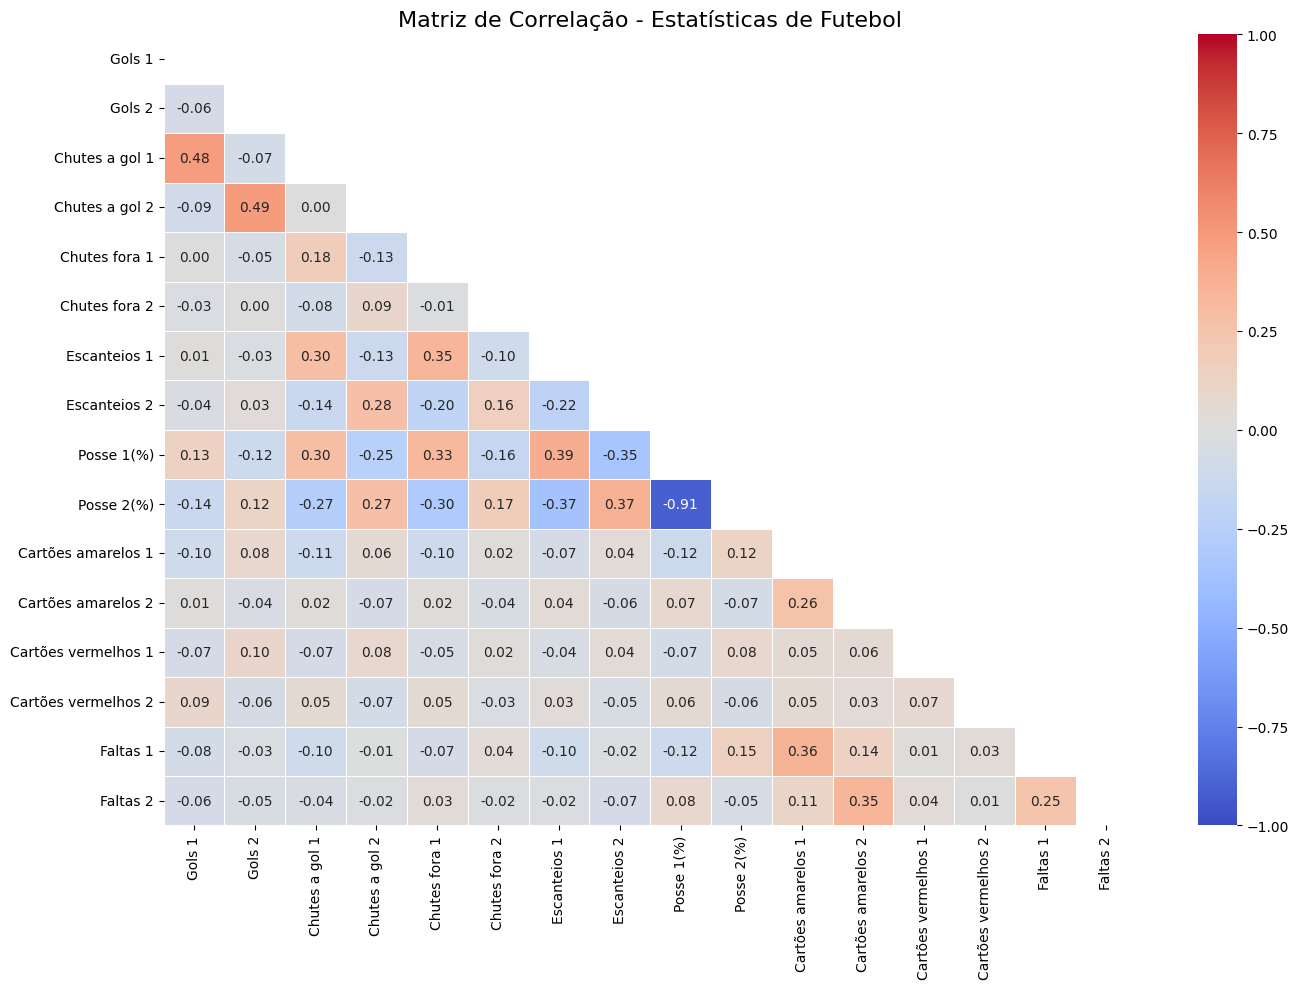

In [ ]:
# Selecionando colunas numéricas relevantes para correlação
colunas_correlacao = [
    'Gols 1', 'Gols 2', 
    'Chutes a gol 1', 'Chutes a gol 2', 
    'Chutes fora 1', 'Chutes fora 2',
    'Escanteios 1', 'Escanteios 2', 
    'Posse 1(%)', 'Posse 2(%)',
    'Cartões amarelos 1', 'Cartões amarelos 2',
    'Cartões vermelhos 1', 'Cartões vermelhos 2',
    'Faltas 1', 'Faltas 2'
]

# Criando matriz de correlação
corr_matrix = df[colunas_correlacao].corr()

plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, vmin=-1, vmax=1)
plt.title('Matriz de Correlação - Estatísticas de Futebol', fontsize=16)
plt.tight_layout()
plt.show()

In [55]:
# Verificando o percentual de valores não nulos em cada coluna
percentual_nao_nulos = df.count() / len(df) * 100
print("Percentual de valores não nulos em cada coluna:")
print(percentual_nao_nulos.sort_values().head(10))
colunas_muitos_nulos = percentual_nao_nulos[percentual_nao_nulos < 90].index.tolist()
print(", ".join(colunas_muitos_nulos))

Percentual de valores não nulos em cada coluna:
Laterais 2           54.722904
Laterais 1           54.722904
Impedimentos 2       89.991341
Impedimentos 1       89.991341
Eficiencia Time 2    91.333526
Eficiencia Time 1    91.456199
Posse 1(%)           91.521143
Escanteios 2         91.600520
Escanteios 1         91.600520
Chutes fora 1        91.614952
dtype: float64
Impedimentos 1, Impedimentos 2, Laterais 1, Laterais 2
